In [149]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load data from Github

In [150]:
def str_to_float(s):
    try:
        # Parse strings with decimal (,) separators
        return float(s.replace(',','.')) if type(s) == str else s
    except ValueError:
        return None

def str_to_date(s):
    try:
        # Parse dates
        return datetime.strptime(s,'%Y-%m-%d') if type(s) == str else s
    except ValueError:
        return None

In [151]:
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'

covid_data_df = pd.read_csv(
    url,
    converters={'total_deaths_per_million': str_to_float,
                'date': str_to_date
               },
    low_memory=False
)

## Select countries

In [152]:
# iterating the columns 
for col in covid_data_df.columns: 
    print(col)

iso_code
continent
location
date
total_cases
new_cases
new_cases_smoothed
total_deaths
new_deaths
new_deaths_smoothed
total_cases_per_million
new_cases_per_million
new_cases_smoothed_per_million
total_deaths_per_million
new_deaths_per_million
new_deaths_smoothed_per_million
reproduction_rate
icu_patients
icu_patients_per_million
hosp_patients
hosp_patients_per_million
weekly_icu_admissions
weekly_icu_admissions_per_million
weekly_hosp_admissions
weekly_hosp_admissions_per_million
new_tests
total_tests
total_tests_per_thousand
new_tests_per_thousand
new_tests_smoothed
new_tests_smoothed_per_thousand
positive_rate
tests_per_case
tests_units
total_vaccinations
people_vaccinated
people_fully_vaccinated
new_vaccinations
new_vaccinations_smoothed
total_vaccinations_per_hundred
people_vaccinated_per_hundred
people_fully_vaccinated_per_hundred
new_vaccinations_smoothed_per_million
stringency_index
population
population_density
median_age
aged_65_older
aged_70_older
gdp_per_capita
extreme_pover

In [153]:
countries = [
'France',
'Sweden',
'United Kingdom',
'Brazil',
'United States'
]

covid_data_df = covid_data_df[covid_data_df['location'].isin(countries)]

In [154]:
def plot_serie(column_name, data_frame):
    plt.rcParams['figure.figsize'] = [12, 10]
    plt.rcParams['figure.dpi'] = 200

    # fig = plt.figure()
    # fig.suptitle('Death per million', fontsize=15)

    for key, grp in data_frame.groupby(['location']): 
        plt.plot(grp['date'], grp[column_name], label = key)

    plt.ylabel(column_name, fontsize=18)
    plt.xlabel('Date', fontsize=16)
    plt.legend(loc="upper left")
    plt.show()

In [155]:
starting_date = '2020-01-01'

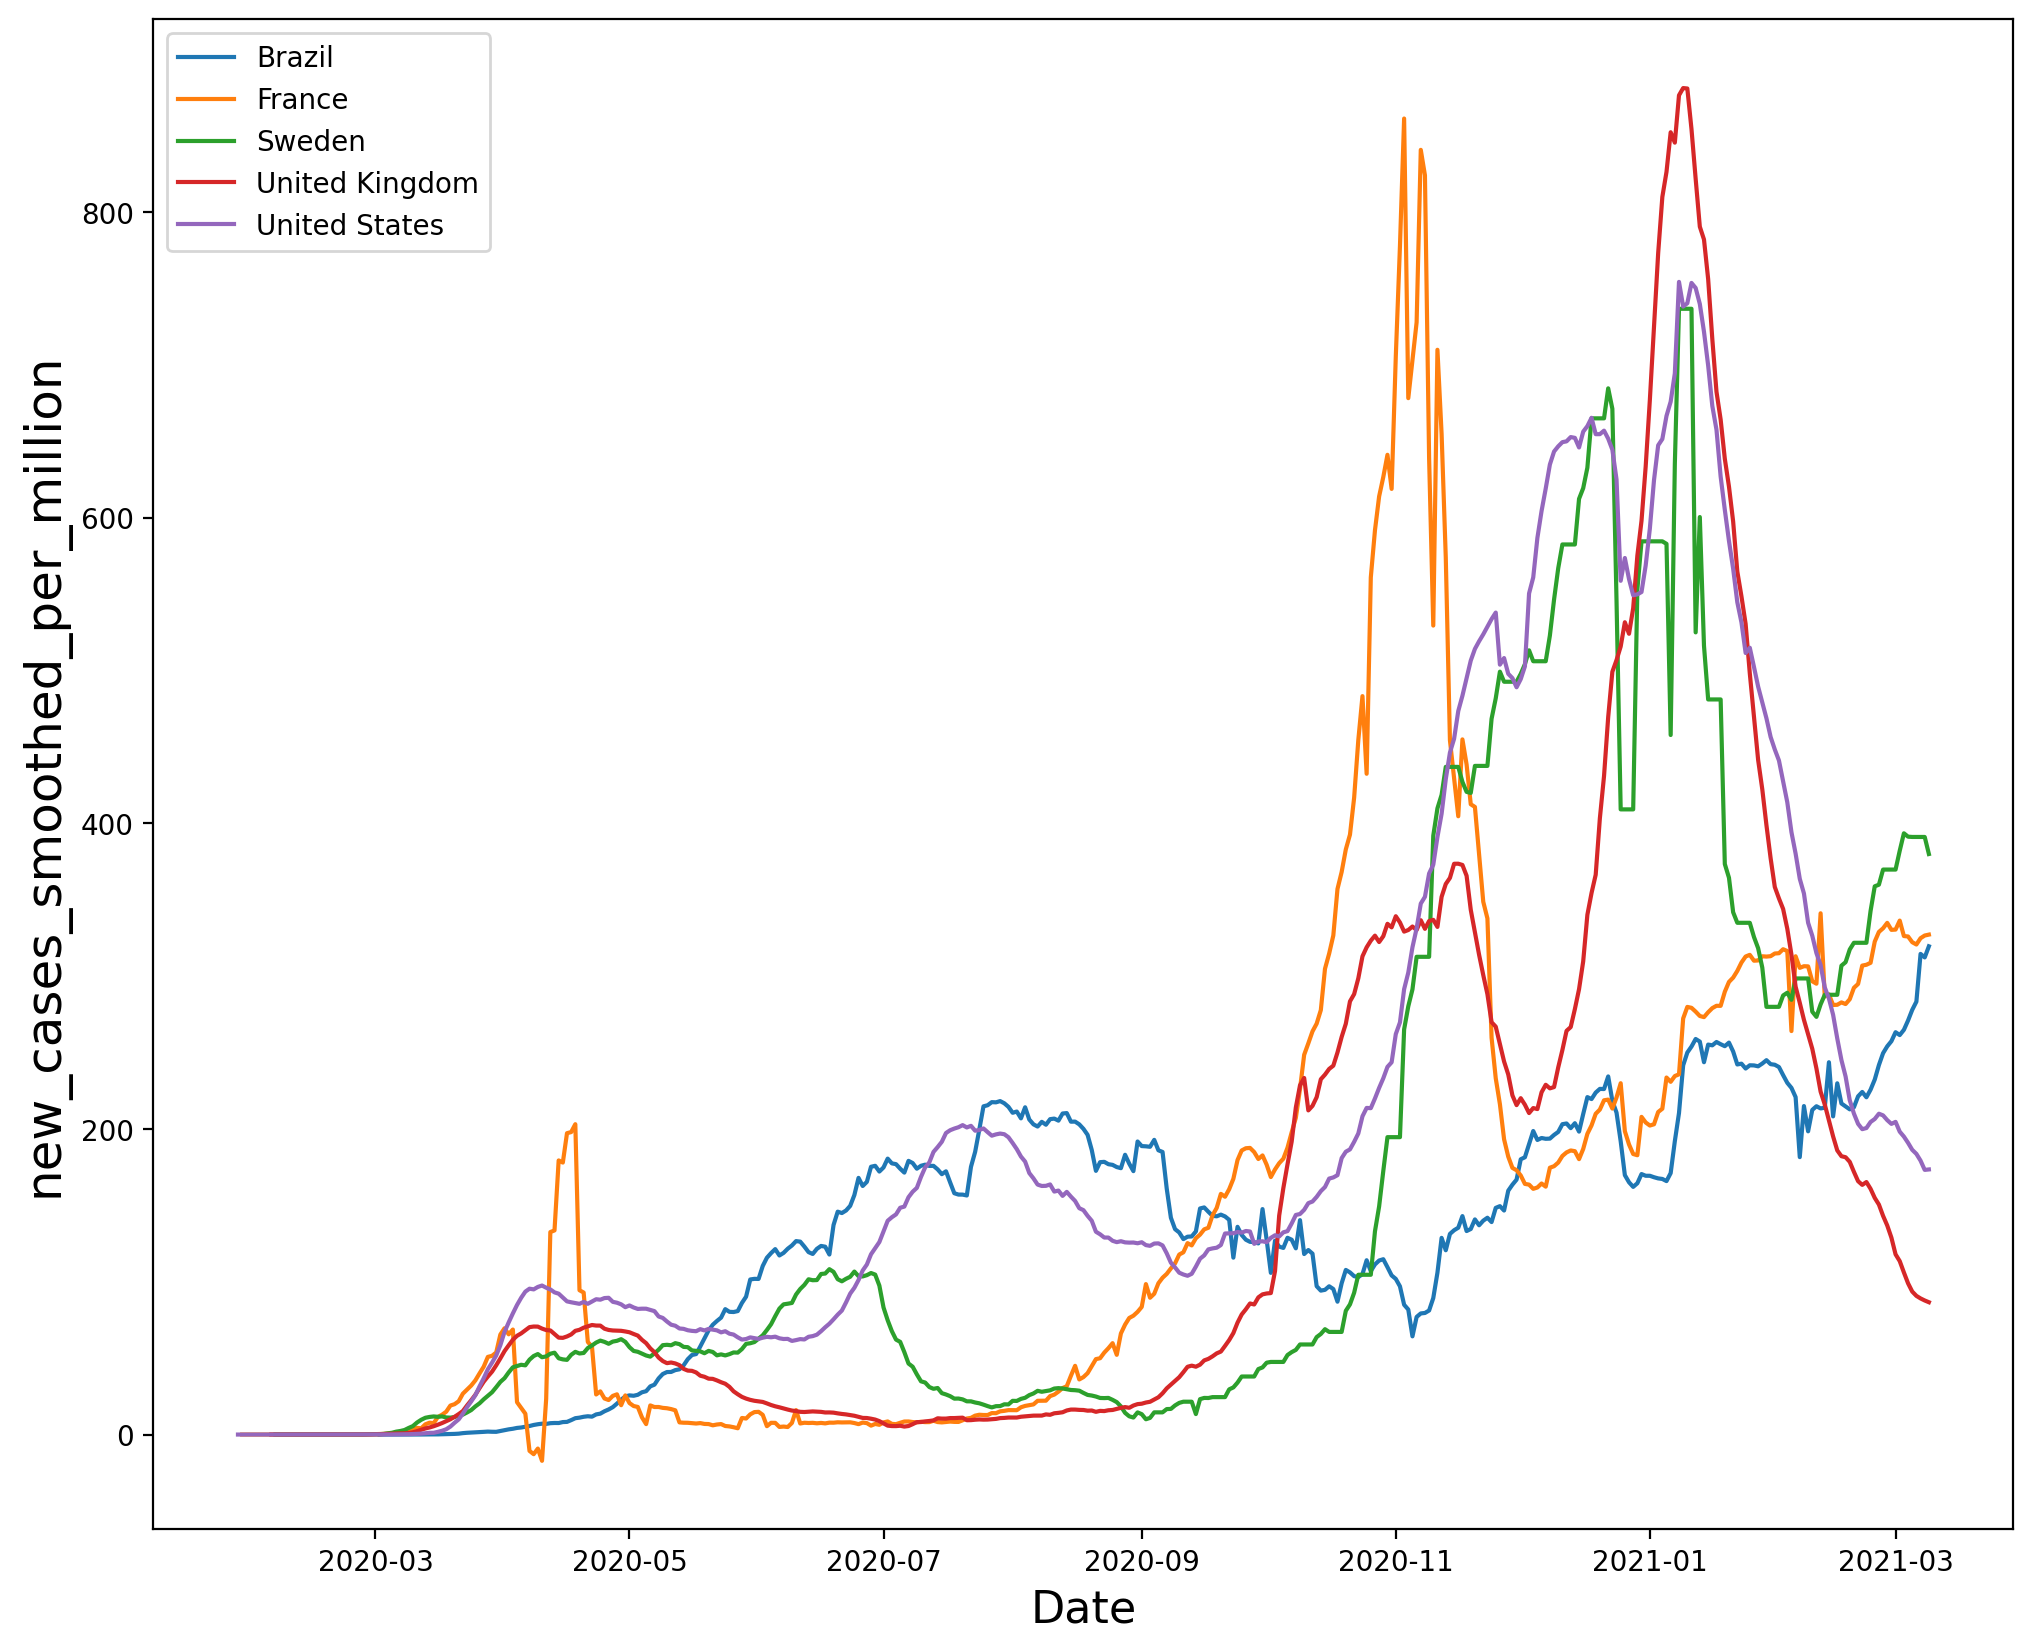

In [156]:
column_name = 'new_cases_smoothed_per_million'
data_frame = covid_data_df[(covid_data_df['date'] > starting_date)]
plot_serie(column_name, data_frame)

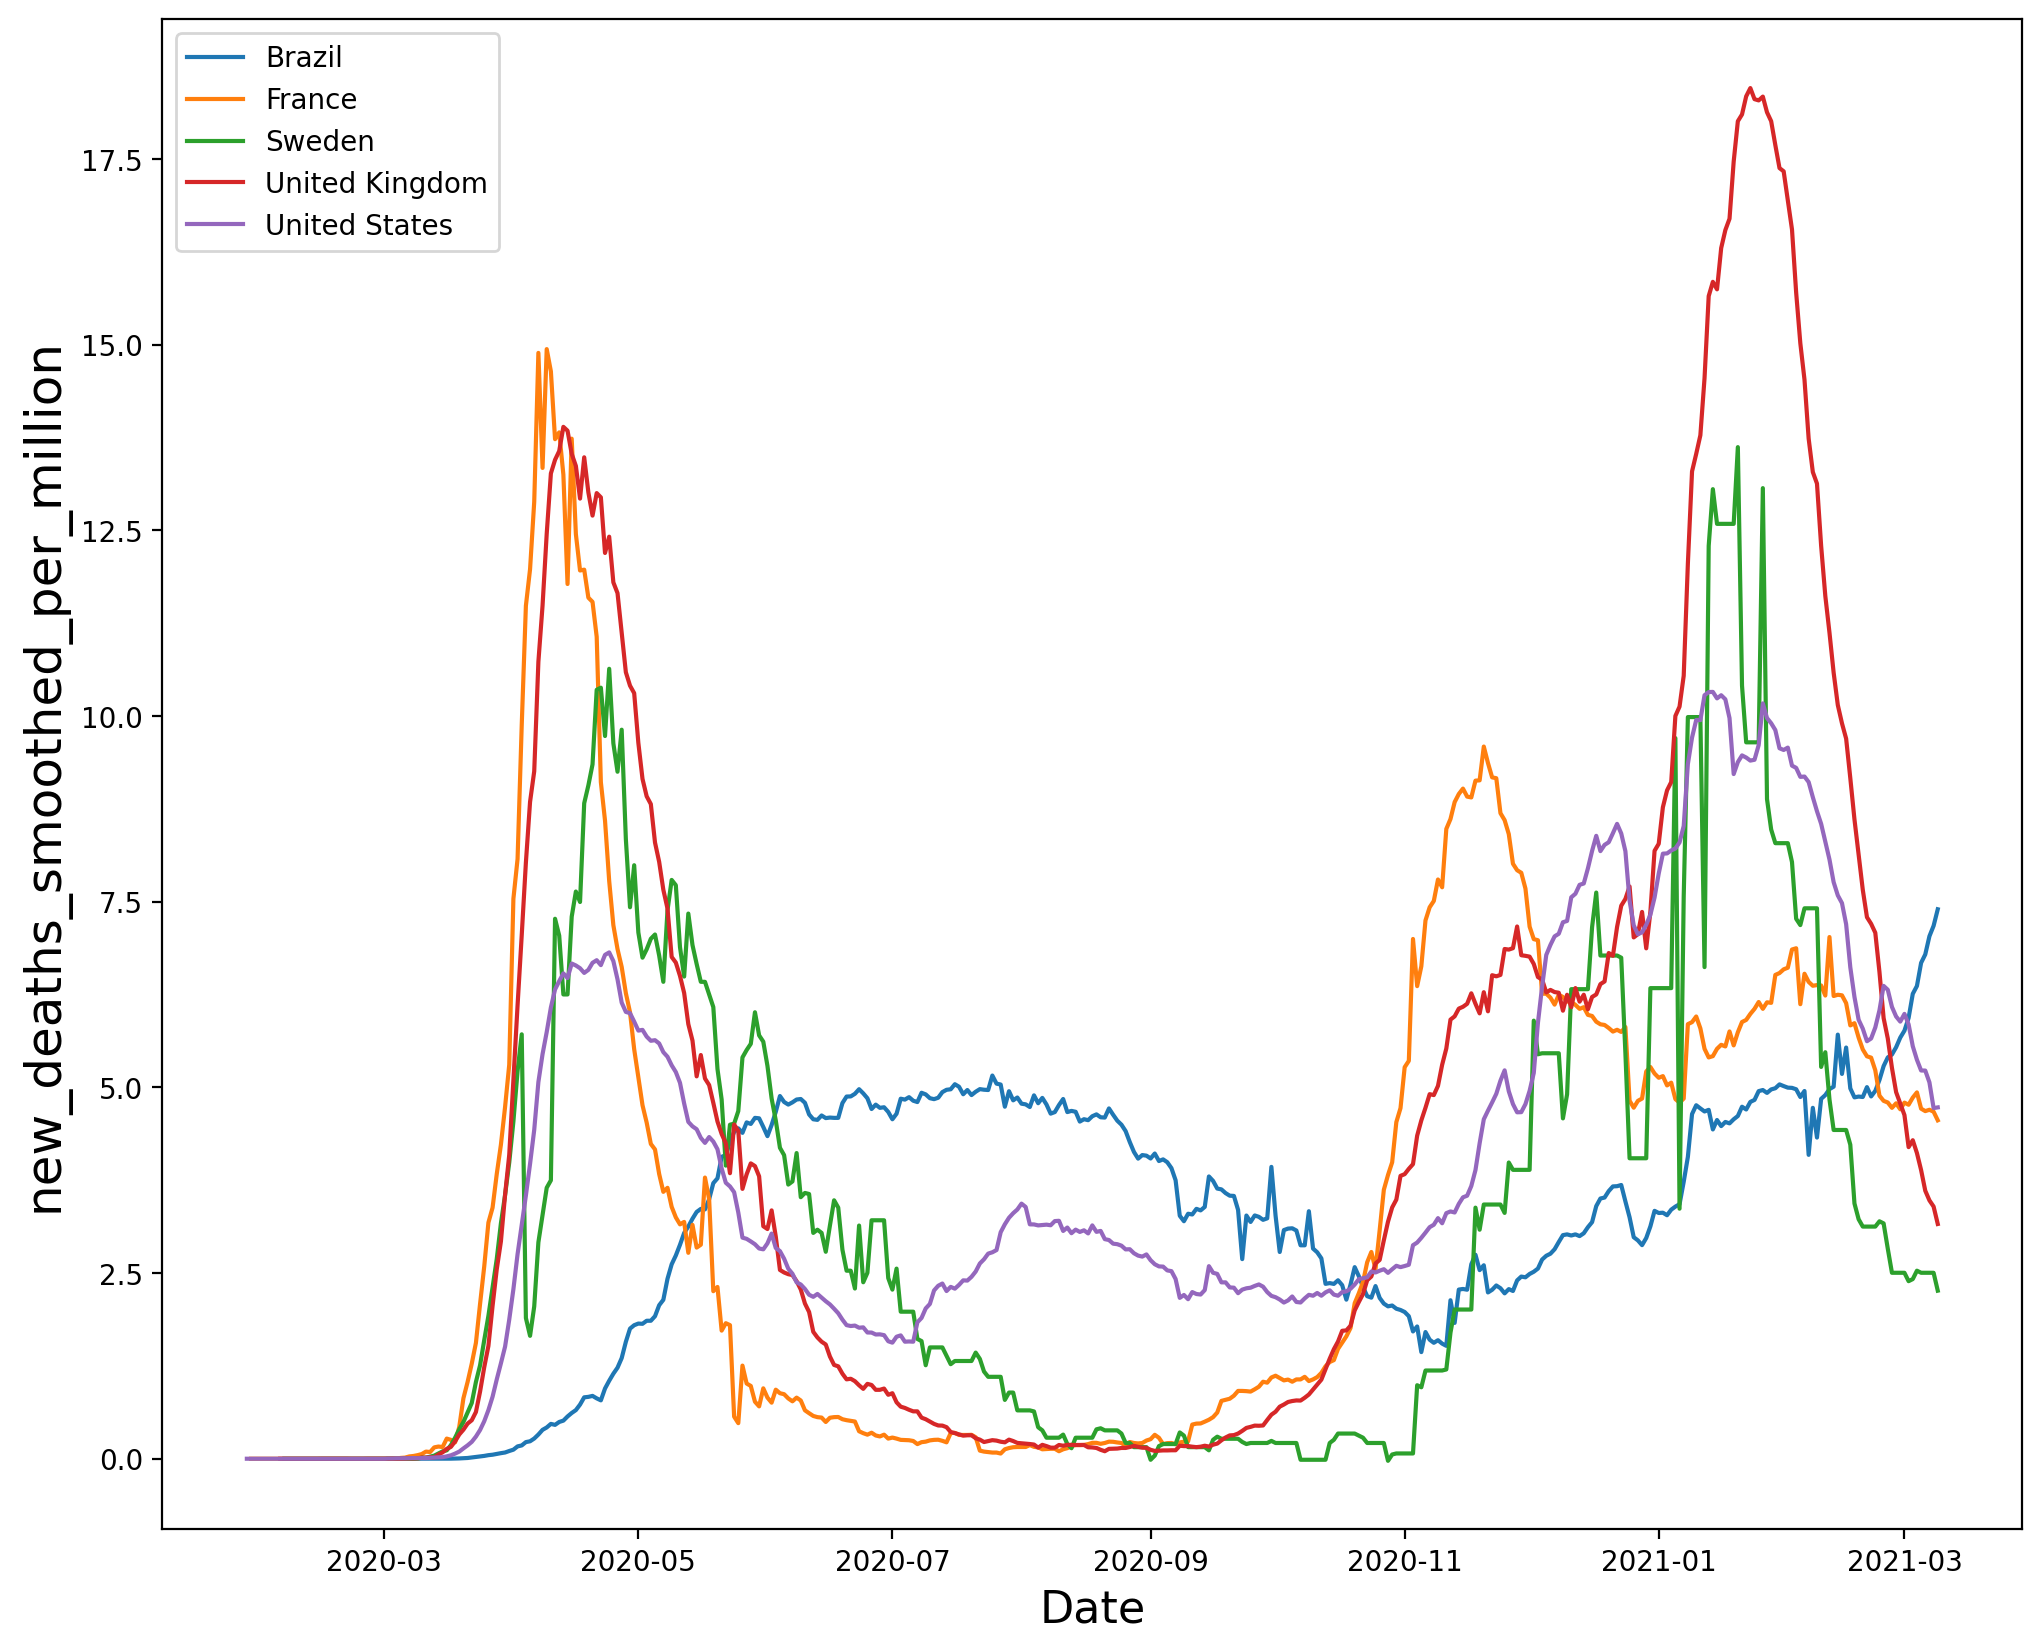

In [157]:
column_name = 'new_deaths_smoothed_per_million'
data_frame = covid_data_df[(covid_data_df['date'] > starting_date)]
plot_serie(column_name, data_frame)

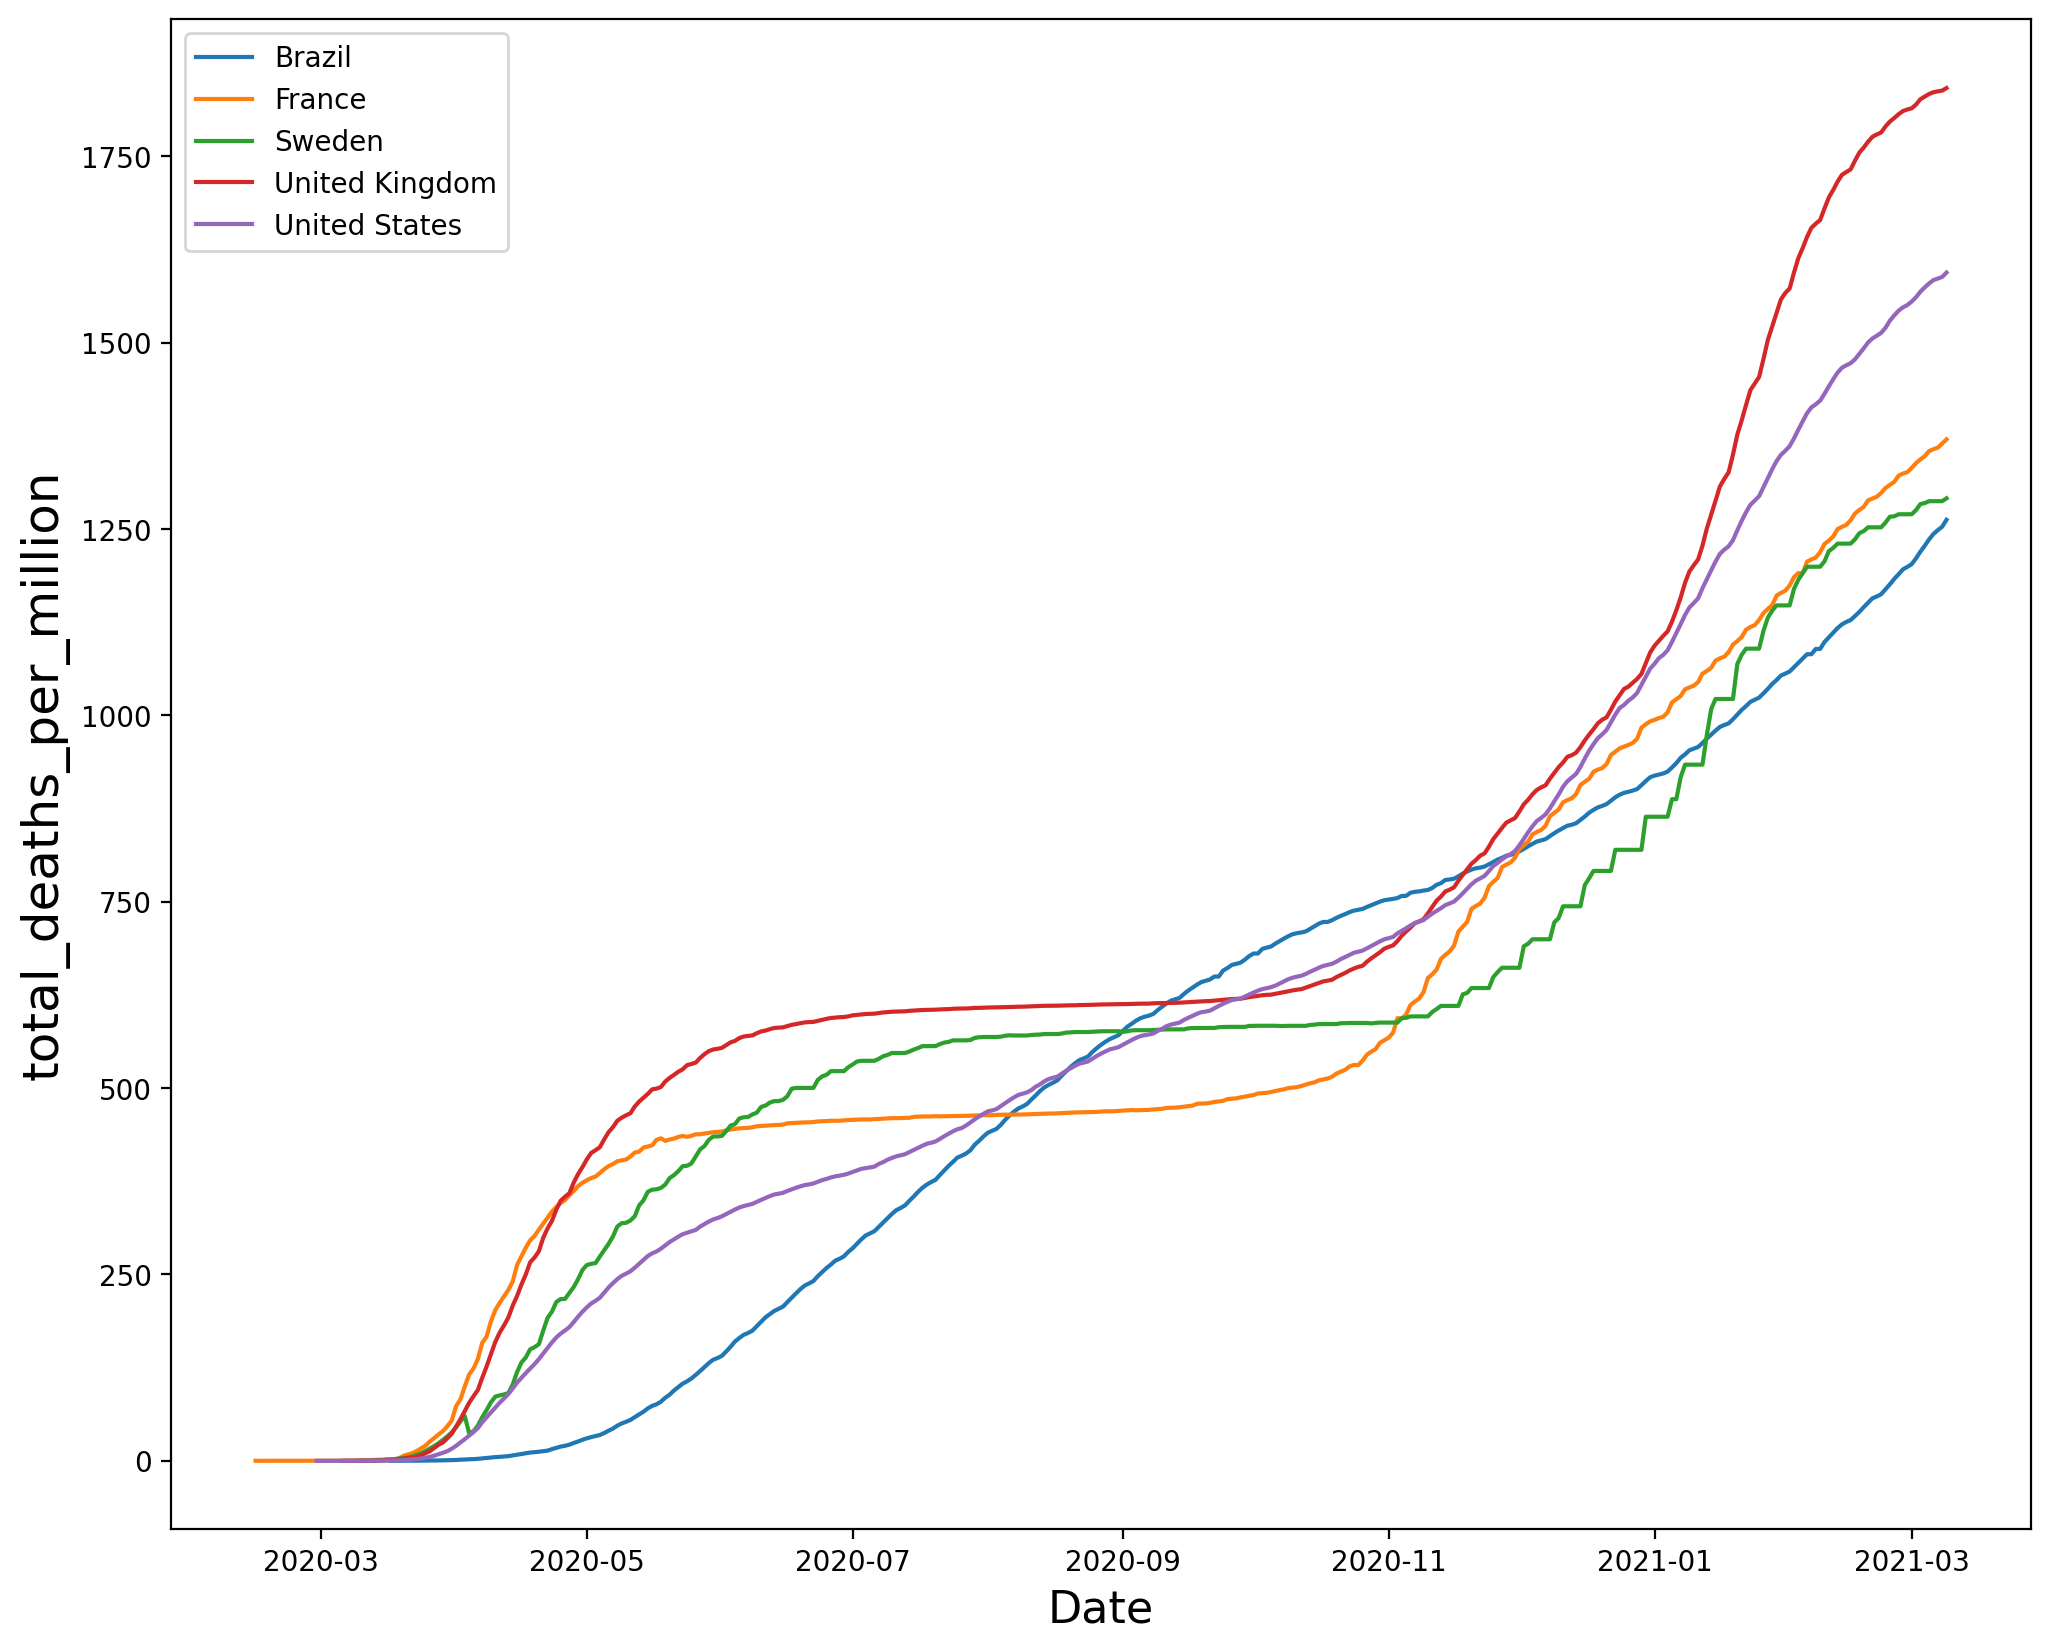

In [158]:
column_name = 'total_deaths_per_million'
data_frame = covid_data_df[(covid_data_df['date'] > starting_date)]
plot_serie(column_name, data_frame)

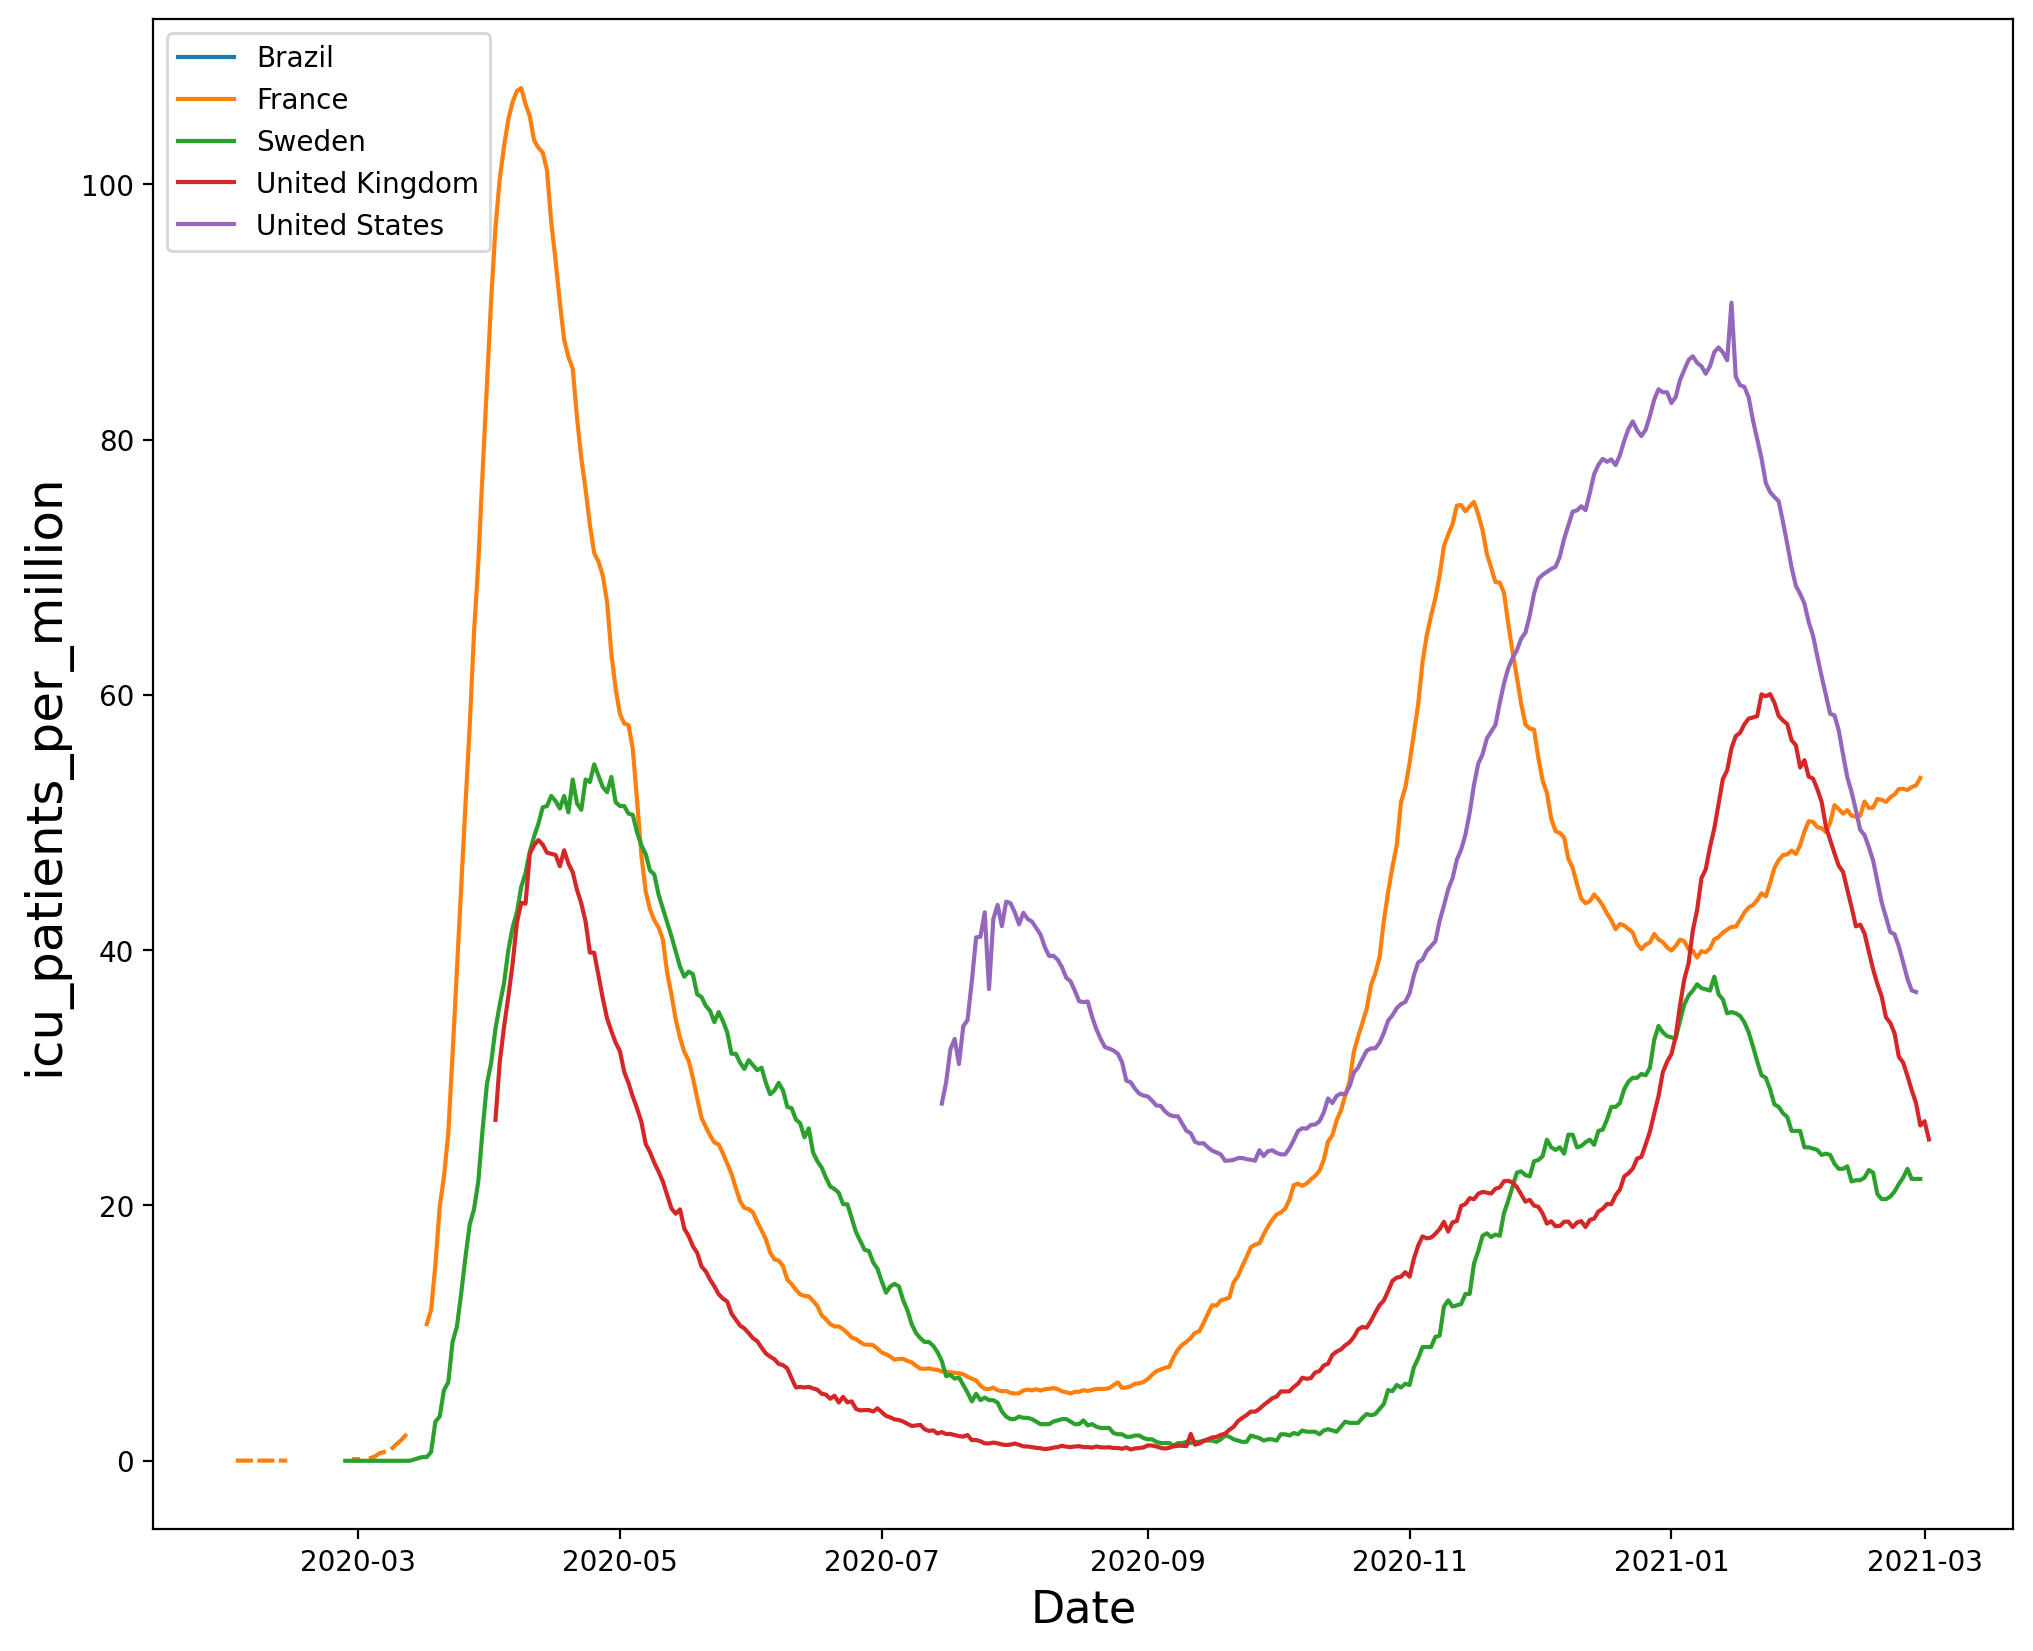

In [159]:
column_name = 'icu_patients_per_million'
data_frame = covid_data_df[(covid_data_df['date'] > starting_date)]
plot_serie(column_name, data_frame)

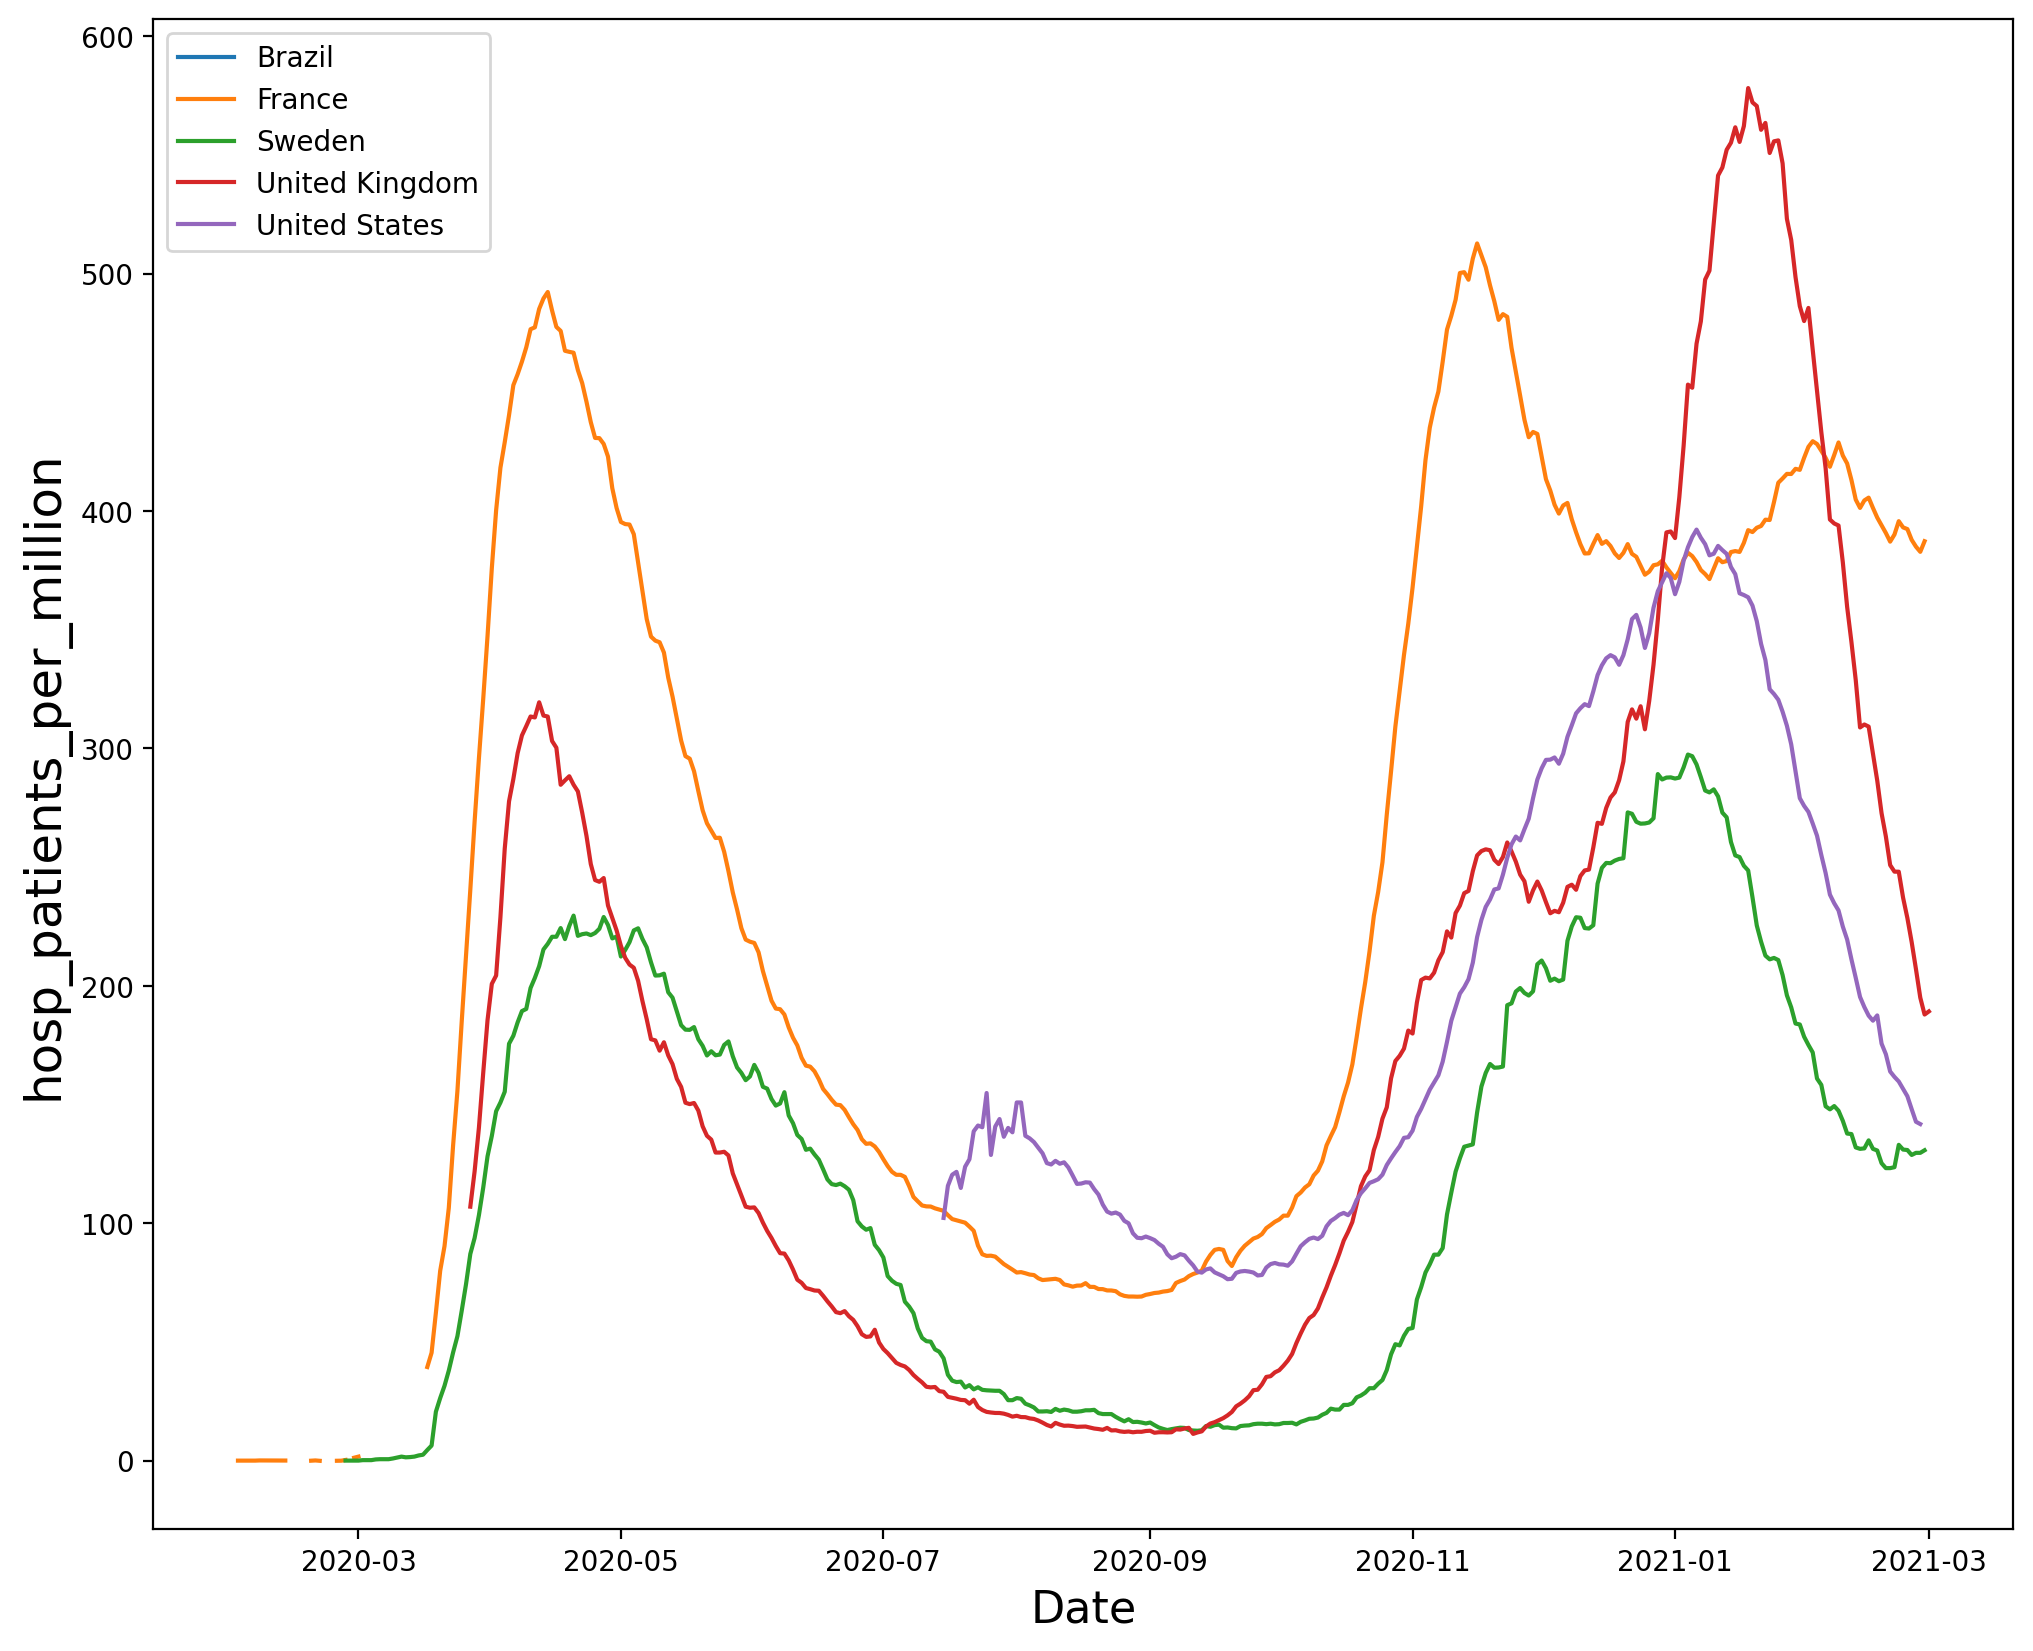

In [160]:
column_name = 'hosp_patients_per_million'
data_frame = covid_data_df[(covid_data_df['date'] > starting_date)]
plot_serie(column_name, data_frame)

In [161]:
covid_data_df_sorted = data_frame.sort_values(by='date', ascending=False).head(10)
covid_data_df_sorted

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
70350,USA,North America,United States,2021-03-09,29096048.0,57417.0,57435.571,527699.0,1947.0,1566.000,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
9859,BRA,South America,Brazil,2021-03-09,11122429.0,70764.0,67929.000,268370.0,1972.0,1572.714,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765
69937,GBR,Europe,United Kingdom,2021-03-09,4241858.0,5869.0,5879.714,125032.0,231.0,214.571,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932
64264,SWE,Europe,Sweden,2021-03-09,695975.0,11014.0,3837.429,13042.0,39.0,22.857,...,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.80,0.945
24571,FRA,Europe,France,2021-03-09,3992755.0,23143.0,21359.143,89455.0,365.0,297.429,...,38605.671,NaN,86.060,4.77,30.1,35.6,NaN,5.98,82.66,0.901
69936,GBR,Europe,United Kingdom,2021-03-08,4235989.0,4823.0,5957.143,124801.0,65.0,230.571,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932
64263,SWE,Europe,Sweden,2021-03-08,684961.0,0.0,3950.286,13003.0,0.0,25.286,...,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.80,0.945
9858,BRA,South America,Brazil,2021-03-08,11051665.0,32321.0,66380.571,266398.0,987.0,1525.429,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765
24570,FRA,Europe,France,2021-03-08,3969612.0,5534.0,21320.429,89090.0,363.0,305.000,...,38605.671,NaN,86.060,4.77,30.1,35.6,NaN,5.98,82.66,0.901
70349,USA,North America,United States,2021-03-08,29038631.0,44758.0,57342.286,525752.0,719.0,1563.143,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
